### Практическое задание №8

На сайте запущен А/В тест с целью увеличить доход. В приложенном excel файле вы найдете сырые данные по результатам эксперимента – user_id, тип выборки variant_name и доход принесенный пользователем revenue.
Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.

In [1]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Загрузим полученные данные из файла AB_Test_Results.xlsx

In [2]:
data = pd.read_excel('AB_Test_Results.xlsx')
data.sample(10)

,USER_ID,VARIANT_NAME,REVENUE
361,7720,control,0.0
3756,7264,variant,0.0
9245,1147,variant,0.0
7600,500,control,0.0
6717,2162,variant,0.0
4645,2461,variant,0.0
5870,392,control,0.0
4991,6271,control,0.5
6405,9395,variant,0.0
8385,7238,control,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


Мы имеем результаты эксперимента и показатель ARPU для контрольной и тестовой группы. Всего 10_000 наблюдений. 
Данные не содержат пустых строк и имеют соответствующий тип данных.

#### 2. Разобъем наши данные на 2 группы контрольную и тестовую для дальнейшего исследования

In [4]:
data_A = data[data['VARIANT_NAME'] == 'control']
data_A['REVENUE'].describe()

count    4984.000000
mean        0.129013
std         3.007524
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       196.010000
Name: REVENUE, dtype: float64

In [5]:
data_B = data[data['VARIANT_NAME'] == 'variant']
data_B['REVENUE'].describe()

count    5016.000000
mean        0.070070
std         1.314802
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        58.630000
Name: REVENUE, dtype: float64

В группе А (контрольная) 4984 наблюдений, среднее значение по доходу составляет 0.129, максимальное значение дохода - 196.01.

В группе B (тестовая) 5016 наблюдений, среднее значение по доходу составляет 0.07, максимальное значение дохода - 58, 63.

Медианы в группах равны - 0.

Исходя из данных, очевидно, что размеры выборки близки по значению, средние значения отличаются на порядок, в группе A среднее значительно больше, но также в группе A максимальное значение в 3.3 раза больше, чем в группе B, что оказывает значительное влияние на среднее значение, смещая его в сторону максимума, возможно в данном случае это выброс. 

Посмотрим на данные групп, исключив из выборки пользователей, которые не совершили ни одной покупки.

In [6]:
data_A = data_A[data_A['REVENUE'] > 0]
data_A.describe()

,USER_ID,REVENUE
count,80.000000,80.000000
mean,4461.950000,8.037500
std,2826.386242,22.498124
min,124.000000,0.020000
25%,2037.500000,1.515000
50%,4327.000000,2.960000
75%,6636.750000,6.657500
max,9766.000000,196.010000


In [7]:
data_B = data_B[data_B['REVENUE'] > 0]
data_B.describe()

,USER_ID,REVENUE
count,72.000000,72.000000
mean,5306.958333,4.881528
std,3116.544256,9.913973
min,56.000000,0.020000
25%,2707.500000,1.245000
50%,5721.000000,2.170000
75%,7963.750000,3.972500
max,9996.000000,58.630000


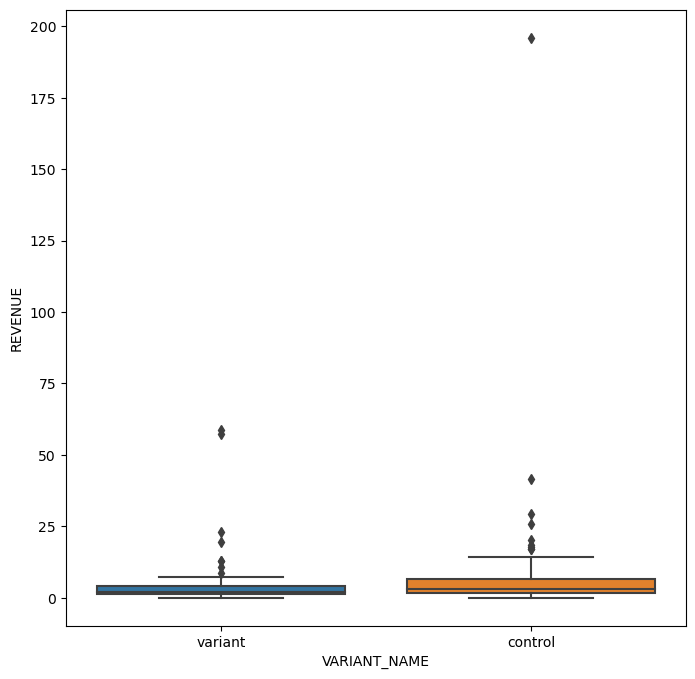

In [8]:
plt.figure(figsize=(8, 8))

data = data[data['REVENUE'] > 0]

sns.boxplot(x=data['VARIANT_NAME'], y=data['REVENUE'], data=data)

plt.show()

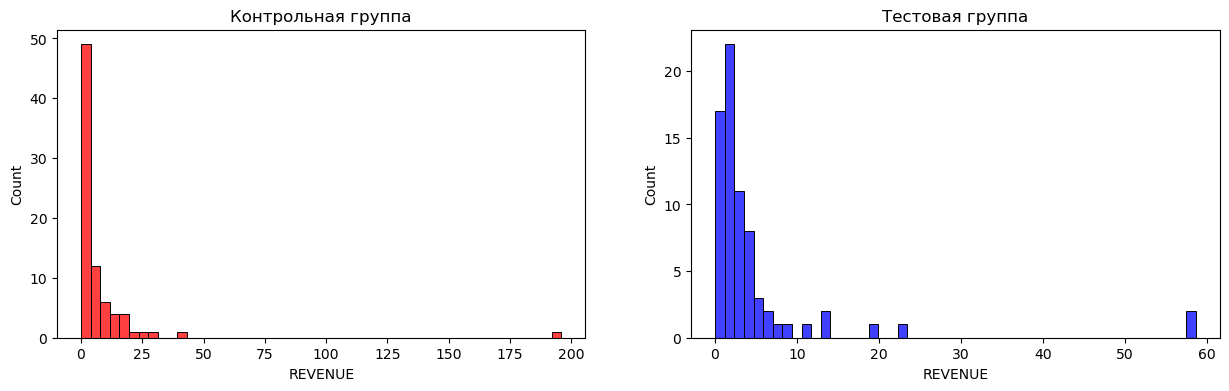

In [9]:
fig, (ax_histplot, ay_histplot) = plt.subplots(1, 2, figsize=(15,4))

ax_histplot.set_title(f"Контрольная группа")
ay_histplot.set_title(f"Тестовая группа")
sns.histplot(data_A['REVENUE'], color='r', bins=50, ax=ax_histplot)
sns.histplot(data_B['REVENUE'], color='b', bins=50, ax=ay_histplot);

На гистограмме и боксплоте очевидны выбросы, как для контрольной группы, так и для тестовой, также очевидно, что распределения наблюдений не нормальные. Исключим из наблюдений выбросы:

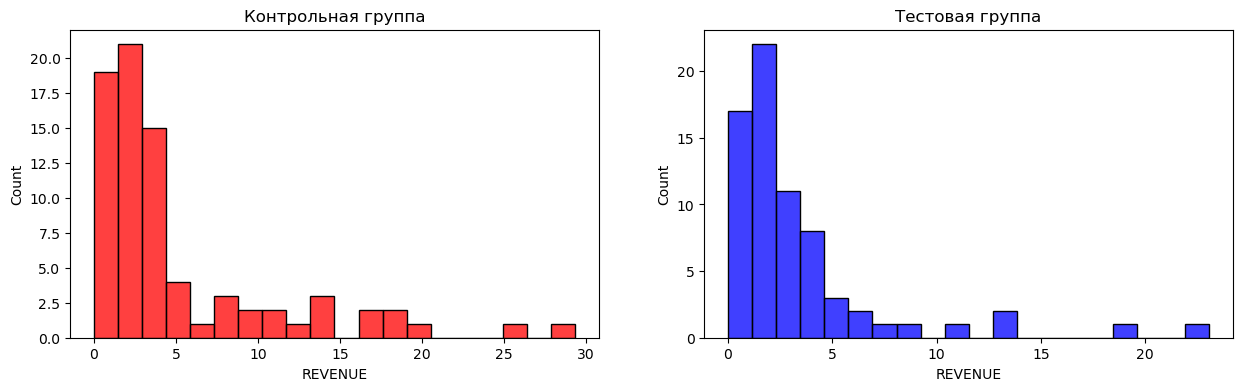

In [10]:
data_A = data_A[data_A['REVENUE'] < data_A['REVENUE'].quantile(0.975)]
data_B = data_B[data_B['REVENUE'] < data_B['REVENUE'].quantile(0.975)]

fig, (ax_histplot, ay_histplot) = plt.subplots(1, 2, figsize=(15, 4))

ax_histplot.set_title('Контрольная группа')
ay_histplot.set_title('Тестовая группа')
sns.histplot(data_A['REVENUE'], bins=20, color='r', ax=ax_histplot)
sns.histplot(data_B['REVENUE'], bins=20, color='b', ax=ay_histplot);

In [11]:
data_A.describe()

,USER_ID,REVENUE
count,78.000000,78.000000
mean,4446.435897,5.198205
std,2847.614817,6.140000
min,124.000000,0.020000
25%,1994.500000,1.505000
50%,4327.000000,2.765000
75%,6590.250000,4.972500
max,9766.000000,29.320000


In [12]:
data_B.describe()

,USER_ID,REVENUE
count,70.000000,70.000000
mean,5314.485714,3.362571
std,3139.548143,4.106318
min,56.000000,0.020000
25%,2588.500000,1.235000
50%,5721.000000,2.165000
75%,8061.250000,3.810000
max,9996.000000,23.040000


После того, как мы исключили из выборок пользователей, которые не совершили ни одной покупки, а также существенные выбросы, мы получили похожие распределения значений доходов, как контрольной, так и тестовой группе, распределения не нормальные, данные независимые и количественные, следовательно для анализа статистических значисости необходим критерриу Манна-Уитни.

Из описательной статистики очевидны различия групп, как по средним значениям, так и по медиане.

In [22]:
from scipy.stats import mannwhitneyu

control = data_A['REVENUE'].values
test = data_B['REVENUE'].values

statistic, p_value = mannwhitneyu(control, test)
print(f'{statistic=:.2f}, {p_value=:.4f}')

if p_value > 0.05:
    print('Нет статистически значимых различий. Не достаточно оснований для отклонения нулевой гипотезы')
else:
    print('Есть статистически значимые различия.')

statistic=3214.00, p_value=0.0632
Нет статистически значимых различий. Не достаточно оснований для отклонения нулевой гипотезы


**Расмотрим также значения статистических показателей без удаления выбросов из тестовой группы**:


In [40]:
df = pd.read_excel('AB_Test_Results.xlsx')

df_A = df[(df['VARIANT_NAME'] == 'control') & (df['REVENUE'] > 0)]
df_A = df_A[df['REVENUE'] < df_A['REVENUE'].quantile(0.975)]

df_B = df[(df['VARIANT_NAME'] == 'variant') & (df['REVENUE'] > 0)]
print(df_B.describe())

control = df_A['REVENUE'].values
test = df_B['REVENUE'].values

statistic, p_value = mannwhitneyu(control, test)
print(f'\n{statistic=:.2f}, {p_value=:.4f}')

if p_value > 0.05:
    print('Нет статистически значимых различий. Не достаточно оснований для отклонения нулевой гипотезы')
else:
    print('Есть статистически значимые различия.')

           USER_ID    REVENUE
count    72.000000  72.000000
mean   5306.958333   4.881528
std    3116.544256   9.913973
min      56.000000   0.020000
25%    2707.500000   1.245000
50%    5721.000000   2.170000
75%    7963.750000   3.972500
max    9996.000000  58.630000

statistic=3214.00, p_value=0.1271
Нет статистически значимых различий. Не достаточно оснований для отклонения нулевой гипотезы


Значение p_value получили значительно больше, чем в предыдущем анализе, и еще раз подтвердилось отсутствие статитстически значимых различий.

**Посмотрим имеется ли разница в количестве пользователей в группах, которые совершили покупку:**

In [43]:
df = pd.read_excel('AB_Test_Results.xlsx')

df_A = df[df['VARIANT_NAME'] == 'control']
df_B = df[df['VARIANT_NAME'] == 'variant']

m_A = df_A[df_A['REVENUE'] > 0].shape[0]
m_B = df_B[df_B['REVENUE'] > 0].shape[0]

n_A = df_A.shape[0]
n_B = df_B.shape[0]

from scipy.stats import chi2_contingency

values = [[m_A, n_A - m_A], [m_B, n_B - m_B]]

statistic, p_value, _, _ = chi2_contingency(values, correction=False)

print(f'\n{statistic=:.2f}, {p_value=:.4f}')

if p_value > 0.05:
    print('Нет статистически значимых различий. Не достаточно оснований для отклонения нулевой гипотезы')
else:
    print('Есть статистически значимые различия.')


statistic=0.48, p_value=0.4879
Нет статистически значимых различий. Не достаточно оснований для отклонения нулевой гипотезы


**Таким образом, мы получили, что в обоих группах, как по конверсии, так и по доходу нет статистически значимых различий.**